# Image Classification with larger CNN

The goal of this exercise is to program a slightly larger CNN that incorporates some of the ideas that have been presented in the class. We use CIFAR-100, which is a bit more challenging than the MNIST data set, but not so much. It contains 50000 images that are labelled into 100 fine-grained classes of 20 more coarse grained classes. In order to make the task a mit more complicated we will use the fine grained classes.

The dataset is build into keras.

In [1]:
import keras
import keras.datasets
import keras.datasets.cifar100
import keras.utils
import keras.optimizers
import numpy as np

import matplotlib.pyplot as plt

print(keras.__version__)

2025-11-11 15:06:58.823840: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-11 15:06:58.881165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 15:07:00.256466: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


3.12.0


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
    'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
    'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
    'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp',
    'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree',
    'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate',
    'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

/tmp/ipykernel_16371/4234832626.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(label_names[int(y_train[index])])


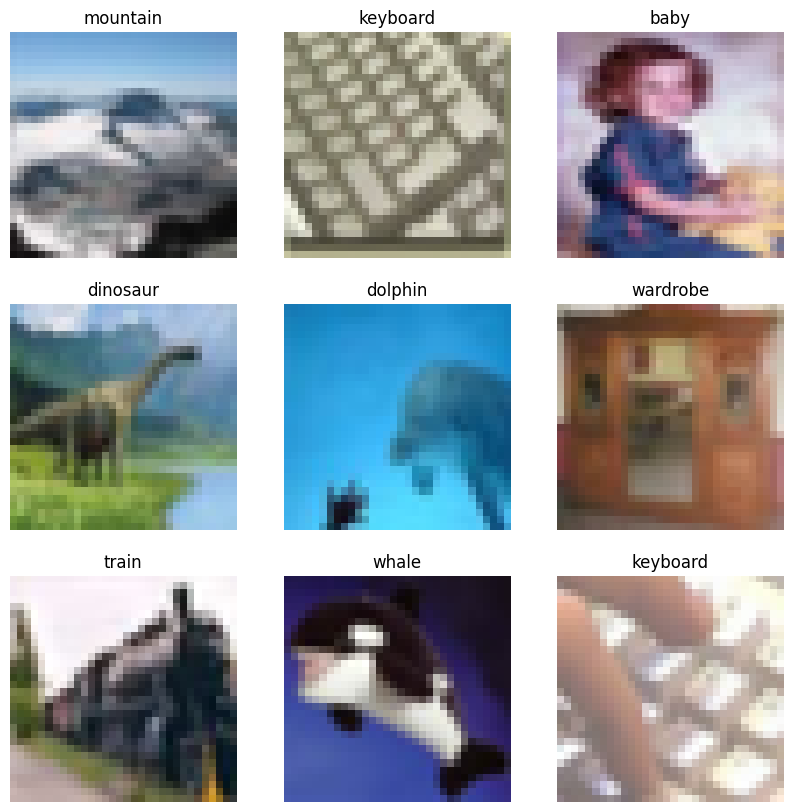

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(50000)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(x_train[index]).astype("uint8"))
    plt.title(label_names[int(y_train[index])])
    plt.axis("off")

In [5]:
num_classes = 100
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
def build_model():
    inp = keras.Input(shape=(32, 32, 3))
    x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu")(x)
    #x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(100, activation='softmax')(x)
                        
    return keras.Model(inp, x)

In [11]:
model = build_model()

E0000 00:00:1762870092.107730   16371 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1762870092.229799   16371 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       204,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,148 (1.14 MB)

 Trainable params: 298,148 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
batch_size = 128
epochs = 15
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.0353 - loss: 4.5584 - val_accuracy: 0.0454 - val_loss: 4.4022
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.1198 - loss: 3.8494 - val_accuracy: 0.1484 - val_loss: 3.7238
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.1764 - loss: 3.5330 - val_accuracy: 0.1678 - val_loss: 3.6400
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.2054 - loss: 3.3705 - val_accuracy: 0.1826 - val_loss: 3.5019
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.2285 - loss: 3.2460 - val_accuracy: 0.2138 - val_loss: 3.3646
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.2506 - loss: 3.1462 - val_accuracy: 0.2260 - val_loss: 3.3278
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.2627 - loss: 3.0761 - val_accuracy: 0.2190 - val_loss: 3.3753
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.2778 - loss: 3.0032 - 

The performance is not bad, but also not so great. The best results without using additional data for convolutional neural networks is at about 70 percent.

In [16]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.03531111031770706, 0.11977777630090714, 0.1763777732849121, 0.20537777245044708, 0.22851110994815826, 0.25057777762413025, 0.2627333402633667, 0.27782222628593445, 0.2890222370624542, 0.30157777667045593, 0.30864444375038147, 0.3173333406448364, 0.32526665925979614, 0.33604443073272705, 0.34246665239334106]
[0.04540000110864639, 0.14839999377727509, 0.16779999434947968, 0.1826000064611435, 0.21379999816417694, 0.22599999606609344, 0.21899999678134918, 0.20960000157356262, 0.19900000095367432, 0.20980000495910645, 0.22779999673366547, 0.14980000257492065, 0.20819999277591705, 0.1876000016927719, 0.21860000491142273]


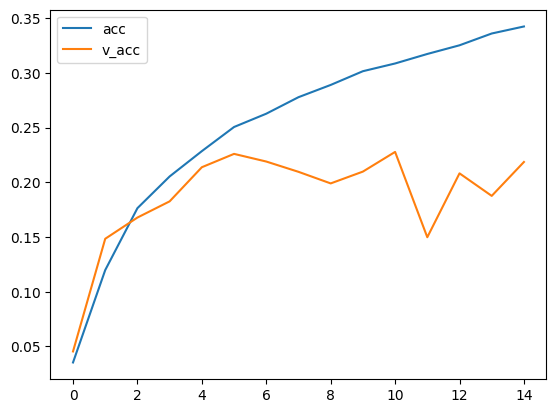

In [15]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='acc')
ax.plot( history.history['val_accuracy'], label='v_acc')
plt.legend()
plt.show()

## Exercise 1: Modern CNN

A *modern* CNN should have some of the features discussed in the lecture. Build a model that includes some or all of these:
- ResNet architecture with skip connections
- Batch Normalization
- L2 Regularisation
- Dropout

How does you model perform?

In [ ]:
def build_better_model():
    inp = keras.Input(shape=(32, 32, 3))
    x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = keras.layers.BatchNormalization(axis=1)(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu")(x)
    x = keras.layers.BatchNormalization(axis=1)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(100, activation='softmax')(x)
                        
    return keras.Model(inp, x)

In [18]:
better_model = build_better_model()

In [19]:
batch_size = 128
epochs = 15
opt = keras.optimizers.RMSprop(learning_rate=0.01)
better_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = better_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.0465 - loss: 5.4958 - val_accuracy: 0.0696 - val_loss: 4.2640
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.1275 - loss: 3.7758 - val_accuracy: 0.1490 - val_loss: 3.6617
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - accuracy: 0.1760 - loss: 3.4943 - val_accuracy: 0.1816 - val_loss: 3.4853
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.2188 - loss: 3.2745 - val_accuracy: 0.2226 - val_loss: 3.3074
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 82ms/step - accuracy: 0.2556 - loss: 3.0723 - val_accuracy: 0.2492 - val_loss: 3.1338
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.2911 - loss: 2.8954 - val_accuracy: 0.2788 - val_loss: 3.0888
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.3266 - loss: 2.7350 - val_accuracy: 0.2954 - val_loss: 2.9060
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.3568 - loss: 2.5907 - 

## Exercise 2: Monitoring

Monitoring the training is essential for long running training sessions. Include tensorboard or wandb in your training setup.

In [ ]:
tensorboard = \
 keras.callbacks.TensorBoard(
 log_dir="./logs", 
 histogram_freq=1, 
 write_graph=True)

In [26]:
import wandb
wandb.tensorboard.patch(root_logdir="./logs")
wandb.init(sync_tensorboard=True, project='cifar-100')

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /home/andy/.netrc
wandb: Currently logged in as: ehc-dragon (ehc-dragon-zhaw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [27]:
history = better_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1, callbacks=[tensorboard])

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.8323 - loss: 0.5565 - val_accuracy: 0.3298 - val_loss: 5.0109
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.8456 - loss: 0.5043 - val_accuracy: 0.3232 - val_loss: 5.2281
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.8587 - loss: 0.4534 - val_accuracy: 0.3318 - val_loss: 5.5143
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.8667 - loss: 0.4181 - val_accuracy: 0.3092 - val_loss: 5.7870
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step - accuracy: 0.8796 - loss: 0.3826 - val_accuracy: 0.3294 - val_loss: 6.1239
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 132ms/step - accuracy: 0.8890 - loss: 0.3486 - val_accuracy: 0.3248 - val_loss: 6.2293
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - accuracy: 0.8953 - loss: 0.3233 - val_accuracy: 0.3202 - val_loss: 6.4944
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.9023 - loss: 0.3040

## Exercise 3: Data Augmentation (continued next lesson)

What else could be done to get better results? The dataset is quite small, so either another dataset could be used for pretraining, or data augmentation could be added....